# Titanic - Machine Learning from Disaster

## Decision Tree Model

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,kinship,FamilyName,Deck,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,1,73,8,0
1,1,1,0,38.0,1,0,596,71.28,0,1,136,2,0
2,1,3,0,26.0,0,0,669,7.92,2,0,251,8,0
3,1,1,0,35.0,1,0,49,26.55,2,1,198,2,0
4,0,3,1,35.0,0,0,472,8.05,2,0,11,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.00,2,0,406,8,0
887,1,1,0,19.0,0,0,14,30.00,2,0,221,1,0
888,0,3,0,29.0,1,2,675,11.72,2,3,293,8,0
889,1,1,1,26.0,0,0,8,30.00,0,0,52,2,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["Survived", "Age", "Fare"], axis=1)
y = train_df["Survived"]

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 10), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 10), (223,))

## Modeling

In [8]:
from common import functions as func

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**Getting Best Hyperparameter Optimization**

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [9]:
# space = dict()
# space['criterion'] = ["gini", "entropy"]
# space['splitter'] = ["best", "random"]
# space['max_depth'] = [n for n in range(20)]
# space['min_samples_split'] = [n for n in range(20)]
# space['min_samples_leaf'] = [n for n in range(20)]

# func.show_best_hyperparameter_optimization(
#     DecisionTreeClassifier(), 
#     space, 
#     X_train, 
#     y_train
# )

**Building, train and predict model**

In [10]:
decision_tree_classifier = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6, 
    min_samples_leaf=3,
    splitter="random")

pipeline = make_pipeline(
    StandardScaler(),
    decision_tree_classifier
)

_ = pipeline.fit(X_train, y_train)

__Check the most relevant features for the training model__

In [11]:
func.get_feature_importances(decision_tree_classifier, X_train)

,Features,Relevance (%)
1,Sex,44
0,Pclass,19
9,AgeGroup,10
8,Deck,8
4,Ticket,5
6,kinship,5
7,FamilyName,4
2,SibSp,3
3,Parch,1
5,Embarked,1


__Predict and show model result__

In [12]:
y_predict = pipeline.predict(X_test)
func.show_model_result(pipeline, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.77094972 0.79775281 0.86516854 0.79775281 0.7752809 ]
Mean = 0.80 / Standard Deviation = 0.03

Confunsion Matrix
----------------------------------------------------------------------
[[113  21]
 [ 27  62]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       134
           1       0.75      0.70      0.72        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

----------------------------------------------------------------------
Accuracy: 0.78
Precicion: 0.75
Sensitivity aka Recall: 0.70
F1-Score: 0.72


**Show Curve ROC and Area Under the ROC**

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.77
----------------------------------------------------------------------


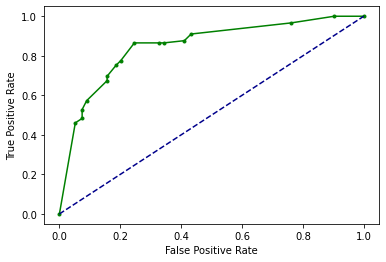

In [13]:
func.show_curve_roc(pipeline, X_test, y_test, y_predict)

__Compare Ground Truth vs Prediction Model__

In [14]:
func.get_error_prediction(X_test, y_test, y_predict)

,Pclass,Sex,SibSp,Parch,Ticket,Embarked,kinship,FamilyName,Deck,AgeGroup,Ground Truth,Prediction
709,3,1,1,1,189,0,2,414,8,0,1,0
621,1,1,1,0,56,2,1,311,3,0,1,0
447,1,1,0,0,45,2,0,544,8,0,1,0
192,3,0,1,0,406,2,1,14,8,0,1,0
819,3,1,3,2,337,2,5,563,8,1,0,1
673,2,1,0,0,145,2,0,645,8,0,1,0
63,3,1,3,2,337,2,5,563,8,1,0,1
141,3,0,0,0,332,2,0,442,8,0,1,0
204,3,1,0,0,530,2,0,117,8,0,1,0
23,1,1,0,0,42,2,0,568,0,0,1,0


In [15]:
train_df[train_df["Ticket"] == 203]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,kinship,FamilyName,Deck,AgeGroup
140,0,3,0,29.0,0,2,203,7.62,0,2,67,8,0
852,0,3,0,9.0,1,1,203,7.62,0,2,67,8,1


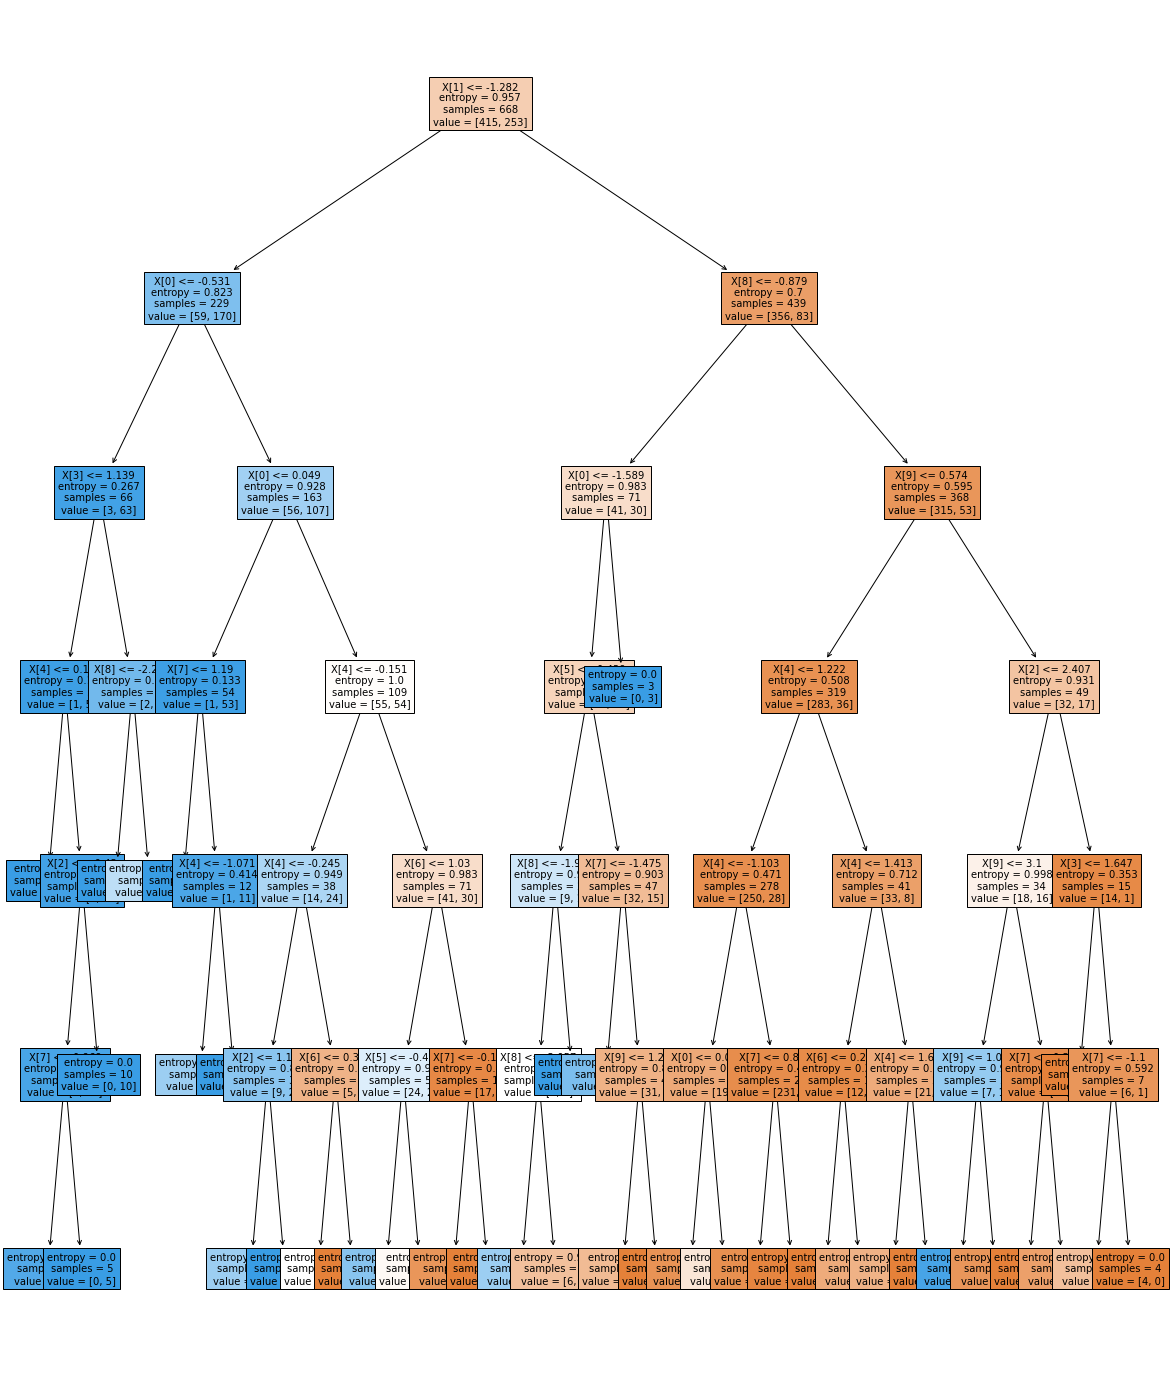

In [16]:
plt.figure(figsize=(20, 25))
tree.plot_tree(decision_tree_classifier, filled=True, fontsize=10)
plt.show()